In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pickle

In [2]:
data=pd.read_csv('/home/aryan/Development/Data_Science/ML_DL_project/Customer_segmentation/online_retail_II.csv')
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [4]:
data.shape

(1067371, 8)

In [5]:
data.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [6]:
data.dropna(inplace=True)

In [7]:
data.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [8]:
data.reset_index(inplace=True)

In [9]:
data.head()

,index,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [10]:
data.drop(columns=['index'],inplace=True)

In [11]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [12]:
data.shape

(824364, 8)

In [13]:
data['Customer ID']=data['Customer ID'].astype('str')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824364 entries, 0 to 824363
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      824364 non-null  object 
 1   StockCode    824364 non-null  object 
 2   Description  824364 non-null  object 
 3   Quantity     824364 non-null  int64  
 4   InvoiceDate  824364 non-null  object 
 5   Price        824364 non-null  float64
 6   Customer ID  824364 non-null  object 
 7   Country      824364 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 50.3+ MB


In [15]:
# new attribute : Monetary

data['Amount']=data['Quantity']*data['Price']
rfm_m=data.groupby("Customer ID")["Amount"].sum()

rfm_m=rfm_m.reset_index()
rfm_m.head()

,Customer ID,Amount
0,12346.0,-64.68
1,12347.0,5633.32
2,12348.0,2019.40
3,12349.0,4404.54
4,12350.0,334.40


In [16]:
# New Attribute : Frequency
rfm_f=data.groupby('Customer ID')['Invoice'].count()
rfm_f=rfm_f.reset_index()
rfm_f.head()

,Customer ID,Invoice
0,12346.0,48
1,12347.0,253
2,12348.0,51
3,12349.0,180
4,12350.0,17


In [17]:
rfm=pd.merge(rfm_f,rfm_m,on='Customer ID',how='inner')
rfm.head()

,Customer ID,Invoice,Amount
0,12346.0,48,-64.68
1,12347.0,253,5633.32
2,12348.0,51,2019.40
3,12349.0,180,4404.54
4,12350.0,17,334.40


In [18]:
# New Attribute : Recency

data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'],format='%Y-%m-%d %H:%M:%S')


In [19]:
data['difference']=data['InvoiceDate'].max()-data["InvoiceDate"]

In [20]:
rfm_r=data.groupby('Customer ID')['difference'].min().dt.days
rfm_r=rfm_r.reset_index()

In [21]:
rfm=pd.merge(rfm,rfm_r,on='Customer ID',how='inner')

In [22]:
rfm.rename(columns={"Invoice":"Frequency","difference":'Recency',"Amount":'Monetary'},inplace=True)

In [23]:
rfm=rfm[['Customer ID',"Recency","Frequency","Monetary"]]

In [24]:
rfm.head()

,Customer ID,Recency,Frequency,Monetary
0,12346.0,325,48,-64.68
1,12347.0,1,253,5633.32
2,12348.0,74,51,2019.40
3,12349.0,18,180,4404.54
4,12350.0,309,17,334.40


<Axes: ylabel='Monetary'>

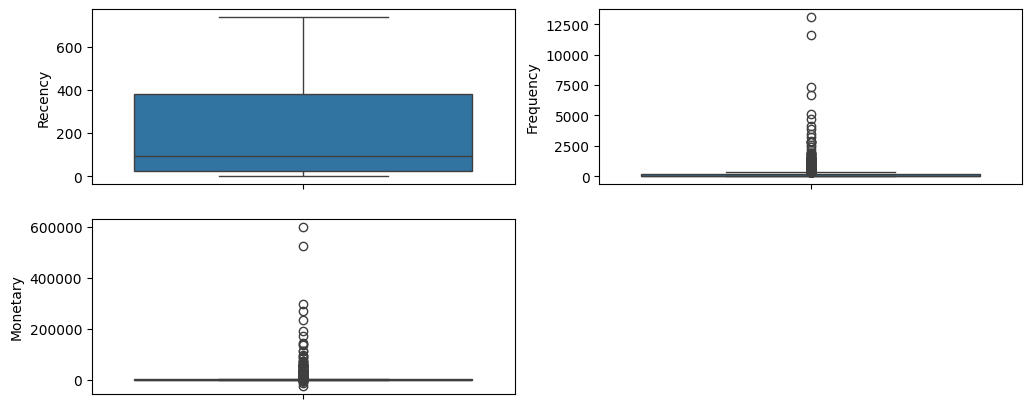

In [25]:
plt.figure(figsize=[12,5])
plt.subplot(2,2,1)           # total number of row , col
sns.boxplot(rfm.Recency)

plt.subplot(2,2,2)
sns.boxplot(rfm.Frequency)

plt.subplot(2,2,3)
sns.boxplot(rfm.Monetary)

<Axes: xlabel='Monetary', ylabel='Count'>

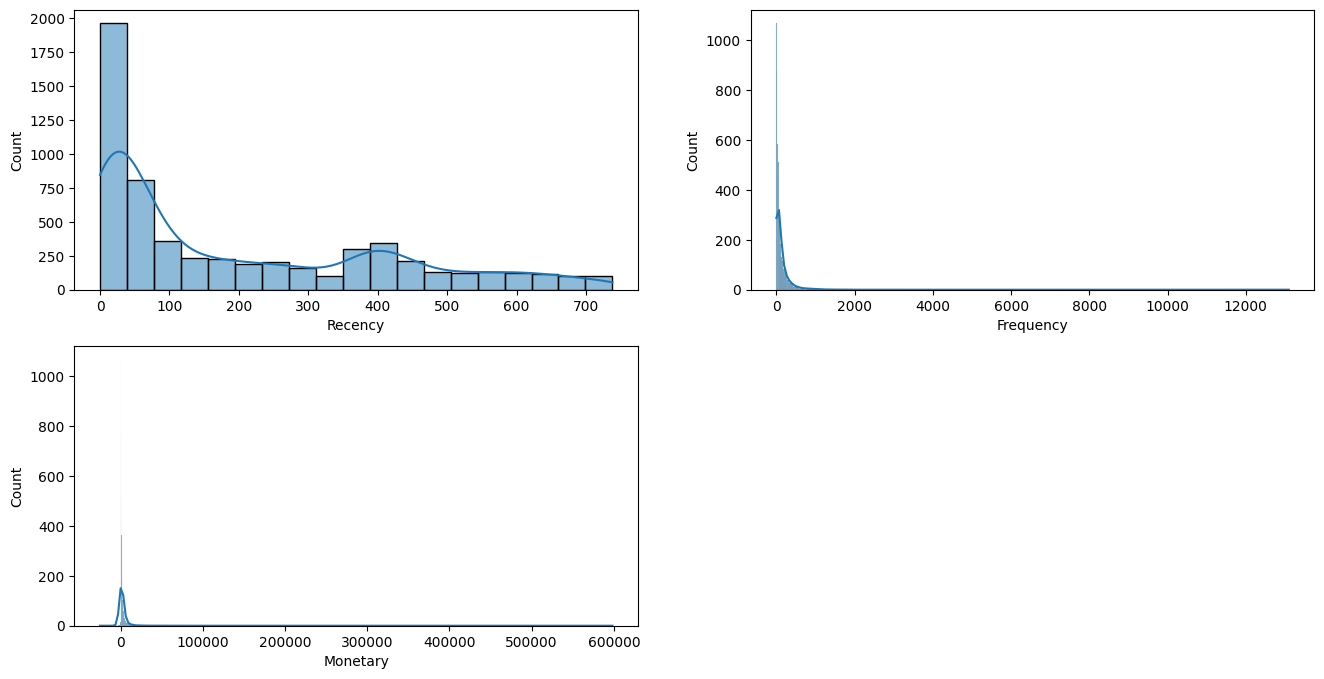

In [26]:

plt.figure(figsize=[16,8])
plt.subplot(2,2,1)
sns.histplot(rfm.Recency,kde=True)

plt.subplot(2,2,2)
sns.histplot(rfm.Frequency,kde=True)

plt.subplot(2,2,3)
sns.histplot(rfm.Monetary,kde=True)

In [27]:
# Removing Outliers using iqr method 

def iqr(col):
    return np.where(col <= (col.quantile(.5)-1.5*(col.quantile(.95)-col.quantile(.5))),(col.quantile(.5)-1.5*(col.quantile(.95)-col.quantile(.5))),
           np.where((col >= col.quantile(.95)+1.5*(col.quantile(.95)-col.quantile(.5))),(col.quantile(.95)+1.5*(col.quantile(.95)-col.quantile(.5))),col)
                    )
    

In [28]:
for col in rfm.columns[1:]:
    rfm[col]=iqr(rfm[col])

<Axes: xlabel='Monetary', ylabel='Count'>

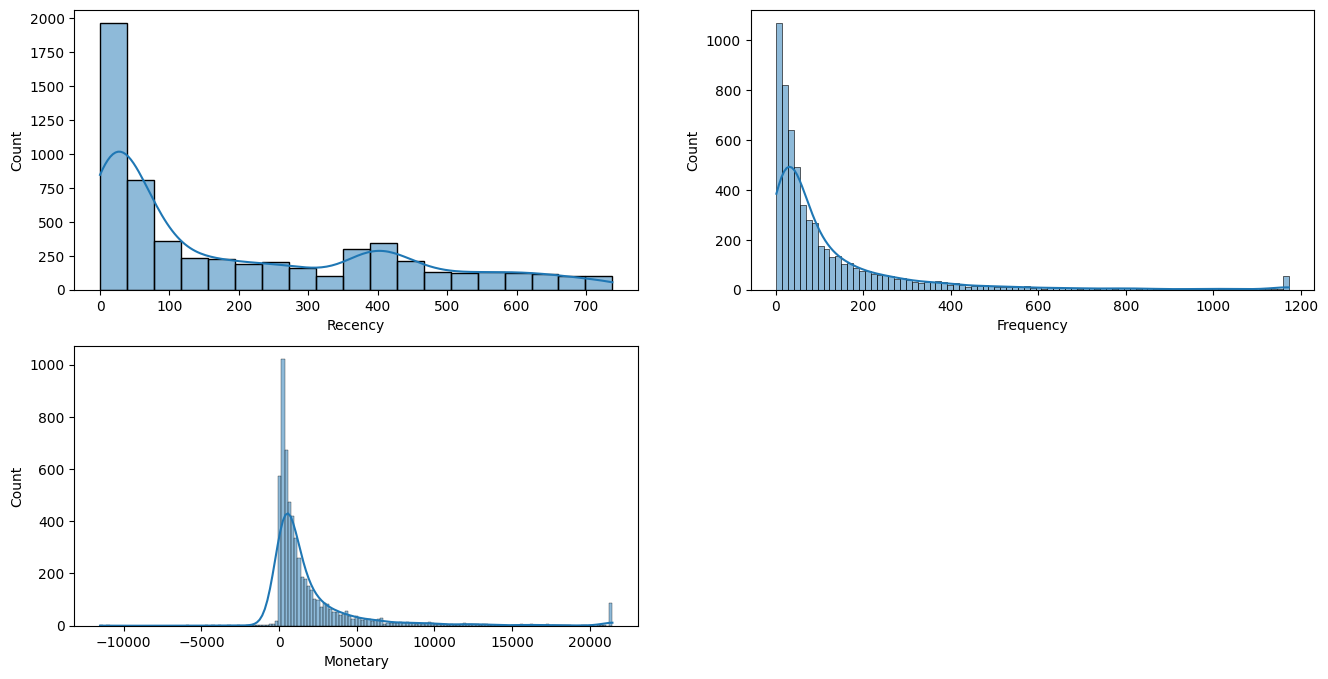

In [29]:

plt.figure(figsize=[16,8])
plt.subplot(2,2,1)
sns.histplot(rfm.Recency,kde=True)

plt.subplot(2,2,2)
sns.histplot(rfm.Frequency,kde=True)

plt.subplot(2,2,3)
sns.histplot(rfm.Monetary,kde=True)

<Axes: ylabel='Monetary'>

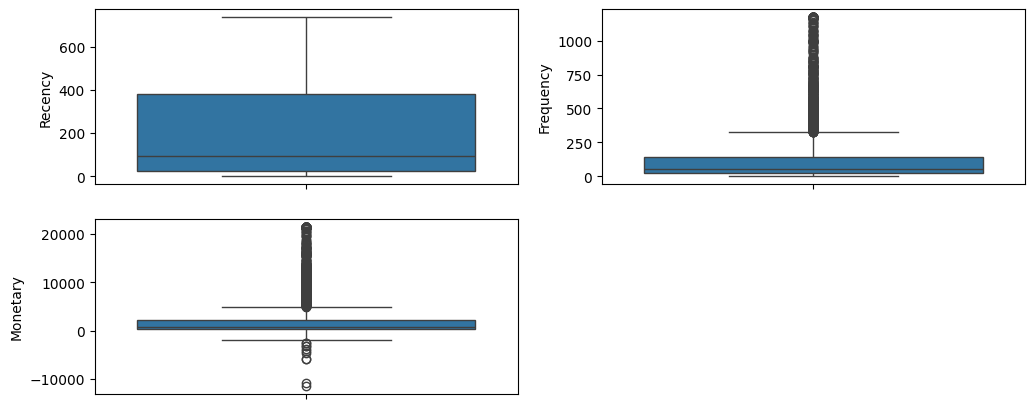

In [30]:
plt.figure(figsize=[12,5])
plt.subplot(2,2,1)           
sns.boxplot(rfm.Recency)

plt.subplot(2,2,2)
sns.boxplot(rfm.Frequency)

plt.subplot(2,2,3)
sns.boxplot(rfm.Monetary)

In [31]:
scaler=StandardScaler()
for col in rfm.columns[1:]:
    rfm[col]=scaler.fit_transform(rfm[col].values.reshape(-1,1))

/home/aryan/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/aryan/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/aryan/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/aryan/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of

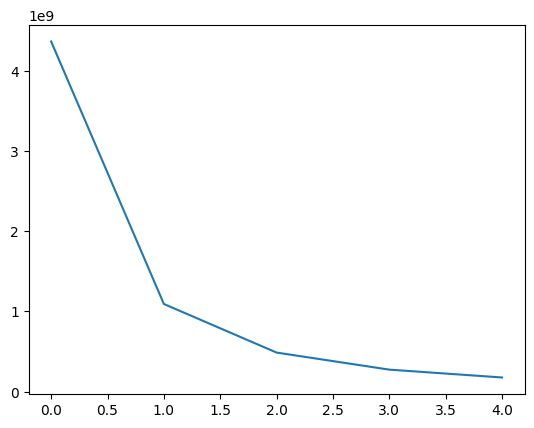

In [32]:
#Forming elbow curve to get right number of clusters
ssd=[]
for i in range(1,11):
    if i%2==0:
        kms=KMeans(n_clusters=i,max_iter=50)
        kms.fit_transform(rfm)
        ssd.append(kms.inertia_)

plt.plot(ssd)
   

In [33]:
from yellowbrick.cluster import SilhouetteVisualizer
import warnings

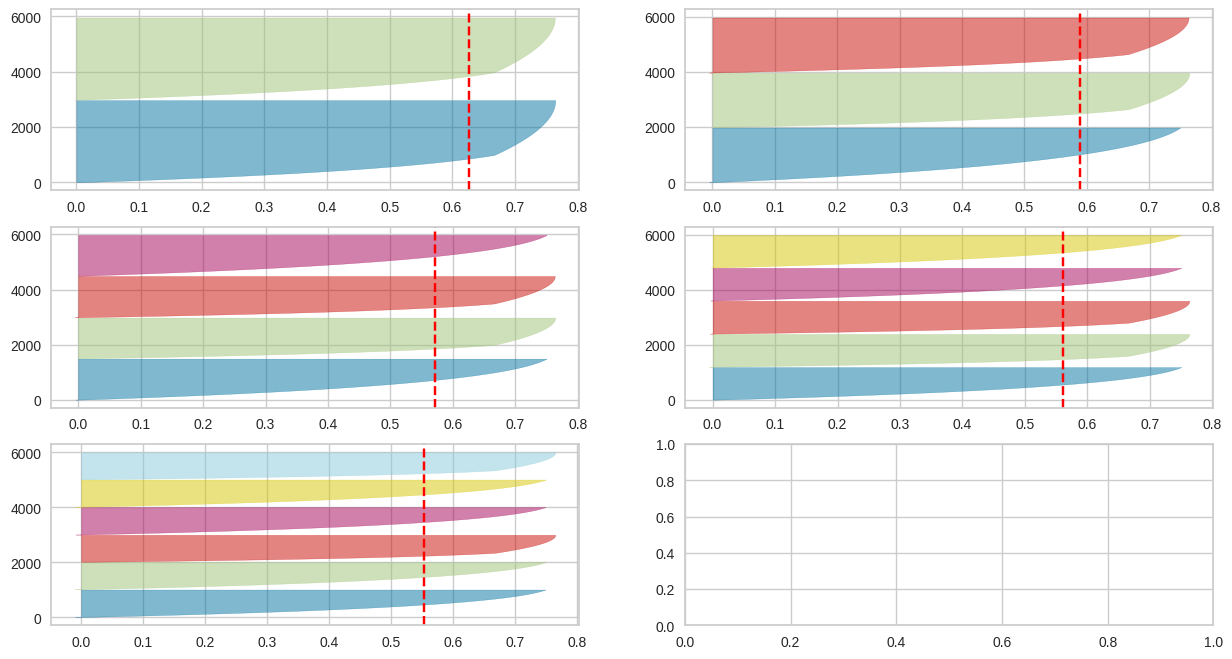

In [34]:

warnings.filterwarnings("ignore")
fig,ax=plt.subplots(3,2,figsize=(15,8))
for i in range(2,7):
    kms=KMeans(n_clusters=i,max_iter=100)
    kms.fit_transform(rfm)
    q,mod=divmod(i,2)
         
    vlz=SilhouetteVisualizer(kms,colors='yellowbrick',ax=ax[q-1][mod])
         
    vlz.fit(rfm)


In [35]:
kms=KMeans(n_clusters=3,max_iter=100,init='k-means++',n_init=10)
kms.fit(rfm)  

kms.predict(rfm)


array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [36]:
with open("/home/aryan/Development/Data_Science/ML_DL_project/Customer_segmentation/Model/model.pkl",'wb') as p:
    pickle.dump(kms,p)

with open("/home/aryan/Development/Data_Science/ML_DL_project/Customer_segmentation/Model/scaler.pkl",'wb') as p:
    pickle.dump(scaler,p)    

In [40]:

x=rfm[['Customer ID','Frequency','Monetary','Recency']]

,Customer ID,Frequency,Monetary,Recency
0,12346.0,-0.403717,-0.601261,0.581058
1,12347.0,0.649165,0.959254,-0.948397
2,12348.0,-0.388309,-0.030493,-0.603798
3,12349.0,0.274236,0.622728,-0.868148
4,12350.0,-0.562933,-0.491965,0.505529
...,...,...,...,...
5937,18283.0,4.413860,0.165941,-0.938956
5938,18284.0,-0.501301,-0.463953,1.071994
5939,18285.0,-0.588613,-0.466604,2.162439
5940,18286.0,-0.290725,-0.258071,1.293860
